In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/hpc-rosneft/drigo/surrogate/src/')
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error as mse

from feature_table import FeatureTable
from dataset import load_features, load, load_variable_years
from models import regress
import cfg

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'feature_table'

In [17]:
def plotting(pred, y_test, model_data, mse_val, years_test):
    # plotting settings
    import matplotlib as mpl
    mpl.rcParams['figure.dpi']= 1200
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.rcParams['figure.figsize'] = [15, 7]
    from IPython.display import set_matplotlib_formats
    set_matplotlib_formats('retina')
    
    plt.plot(pred, label='Predictions')
    plt.plot(y_test, label='Measurements')
    plt.plot(model_data, label = 'NEMO')
    plt.axhline(y=0, color='grey', linestyle='-')
    plt.xlabel('Days since 1 Jan {}'.format(years_test[0]))
    plt.ylabel('Sea ice thickness (m)')
    plt.legend()
    
    plt.title('Sea ice thickness (m), years {}'.format(''.join((str(e)+' ' for e in years_test))))
    plt.text(s='RMSE={}'.format(round(mse_val, 2)),x=0, y=0.01, size=15)

In [18]:
results_df = pd.DataFrame(columns = ['Years_train', 'Years_test', 'X','dx','dy','dt', 'RMSE'])

# Linear regression 1 point


In [19]:
model = Lasso(alpha=0.1, max_iter=10000)

## 1
- **Years train**: 2010-2013
- **Years test** : 2014-2015
- **X train**: sat ice concentration, 2m air temperature
- **y test** : sat ice thickness
- **dx** : 2
- **dy** : 2
- **dt** : 0

Loading ice_conc
Loading tair
Loading thick_cr2smos
Total features 2, X size (1461, 50)
Loading ice_conc
Loading tair
Loading thick_cr2smos
Total features 2, X size (730, 50)


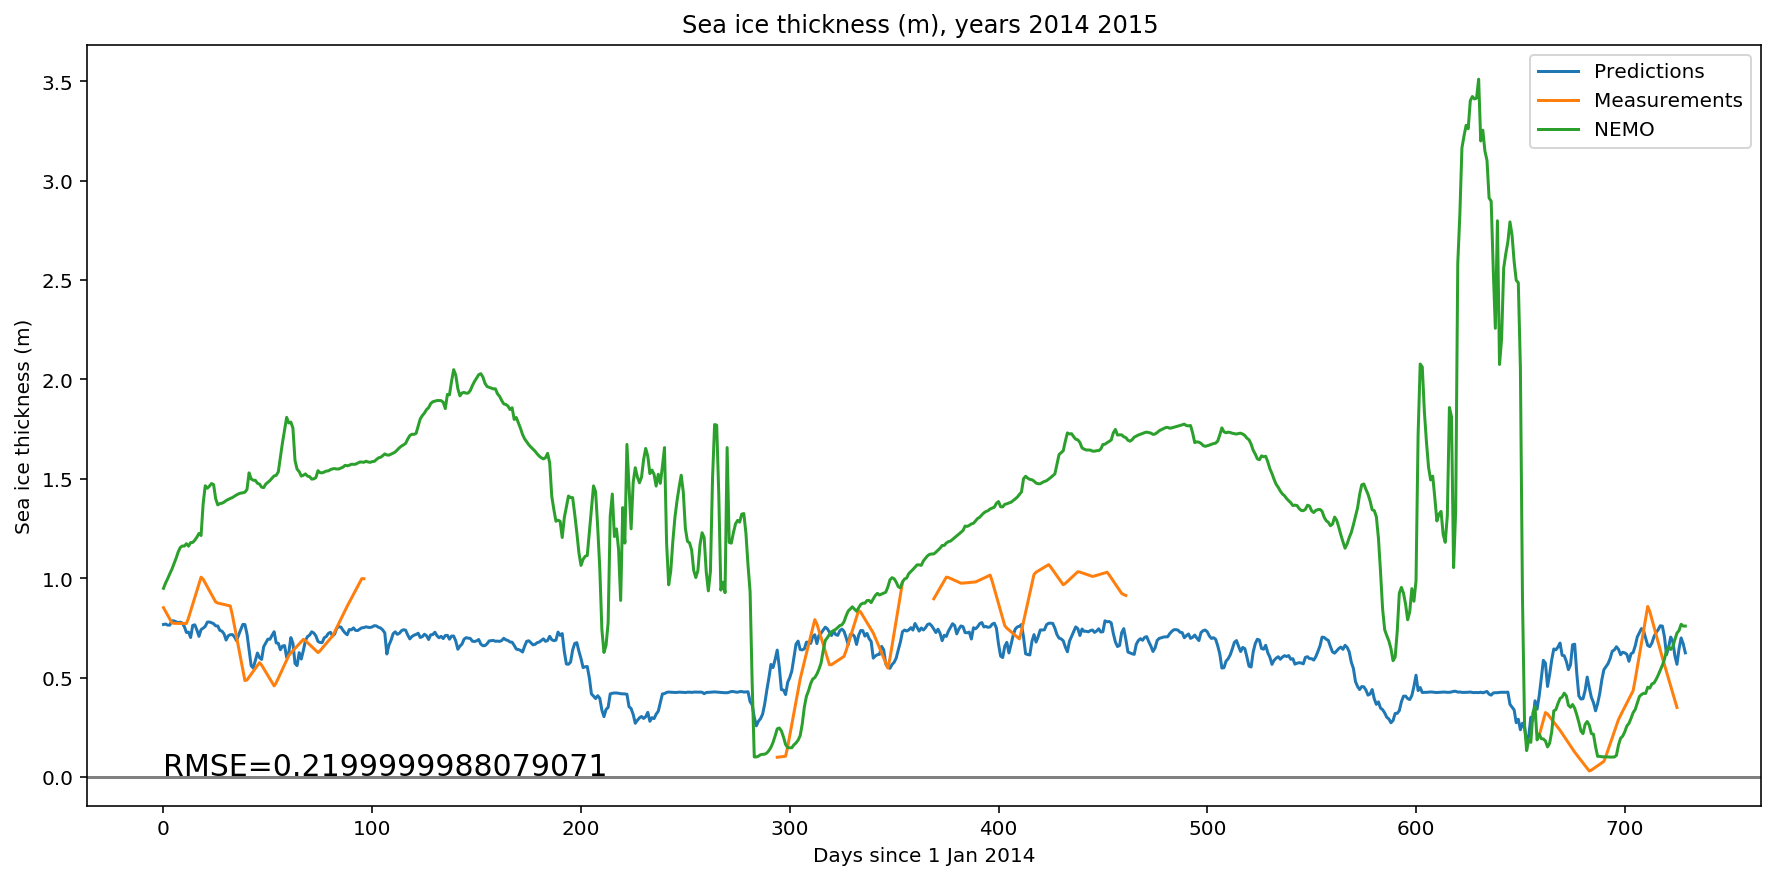

In [26]:
years_train = list(range(2010,2014))
years_test = [2014, 2015]
X_vars = ['ice_conc', 'tair']
y_var = 'thick_cr2smos'
point = (109, 203) # approximately 80N 80E Kara Sea
ft = FeatureTable(dx=2, dy=2, dt=0)

y, X = load_features(X_vars=X_vars,
                     y_var=y_var,
                     years=years_train,
                     point=point,
                     feature_table=ft,
                    autoreg=False)

y_test, X_test = load_features(X_vars=X_vars,
                               y_var=y_var,
                               years=years_test,
                               point=point,
                               feature_table=ft,
                              autoreg=False)
mse_val, pred = regress(X, y, X_test, y_test, model=model)
model_data = load_variable_years('icethic_cea', years_test, point)
plotting(pred, y_test, model_data, mse_val, years_test)

results_df.loc[len(results_df) + 1] = [years_train, years_test, X_vars, ft.dx, ft.dy, ft.dt, mse_val]

### 2
- **Years train**: 2010-2013
- **Years test** : 2014-2015
- **X train**: sat ice concentration, 2m air temperature
- **y test** : sat ice thickness
- **dx** : 10
- **dy** : 10
- **dt** : 0

Loading ice_conc
Loading tair
Loading Thickness
Total features 2, X size (1461, 882)
Loading ice_conc
Loading tair
Loading Thickness
Total features 2, X size (730, 882)


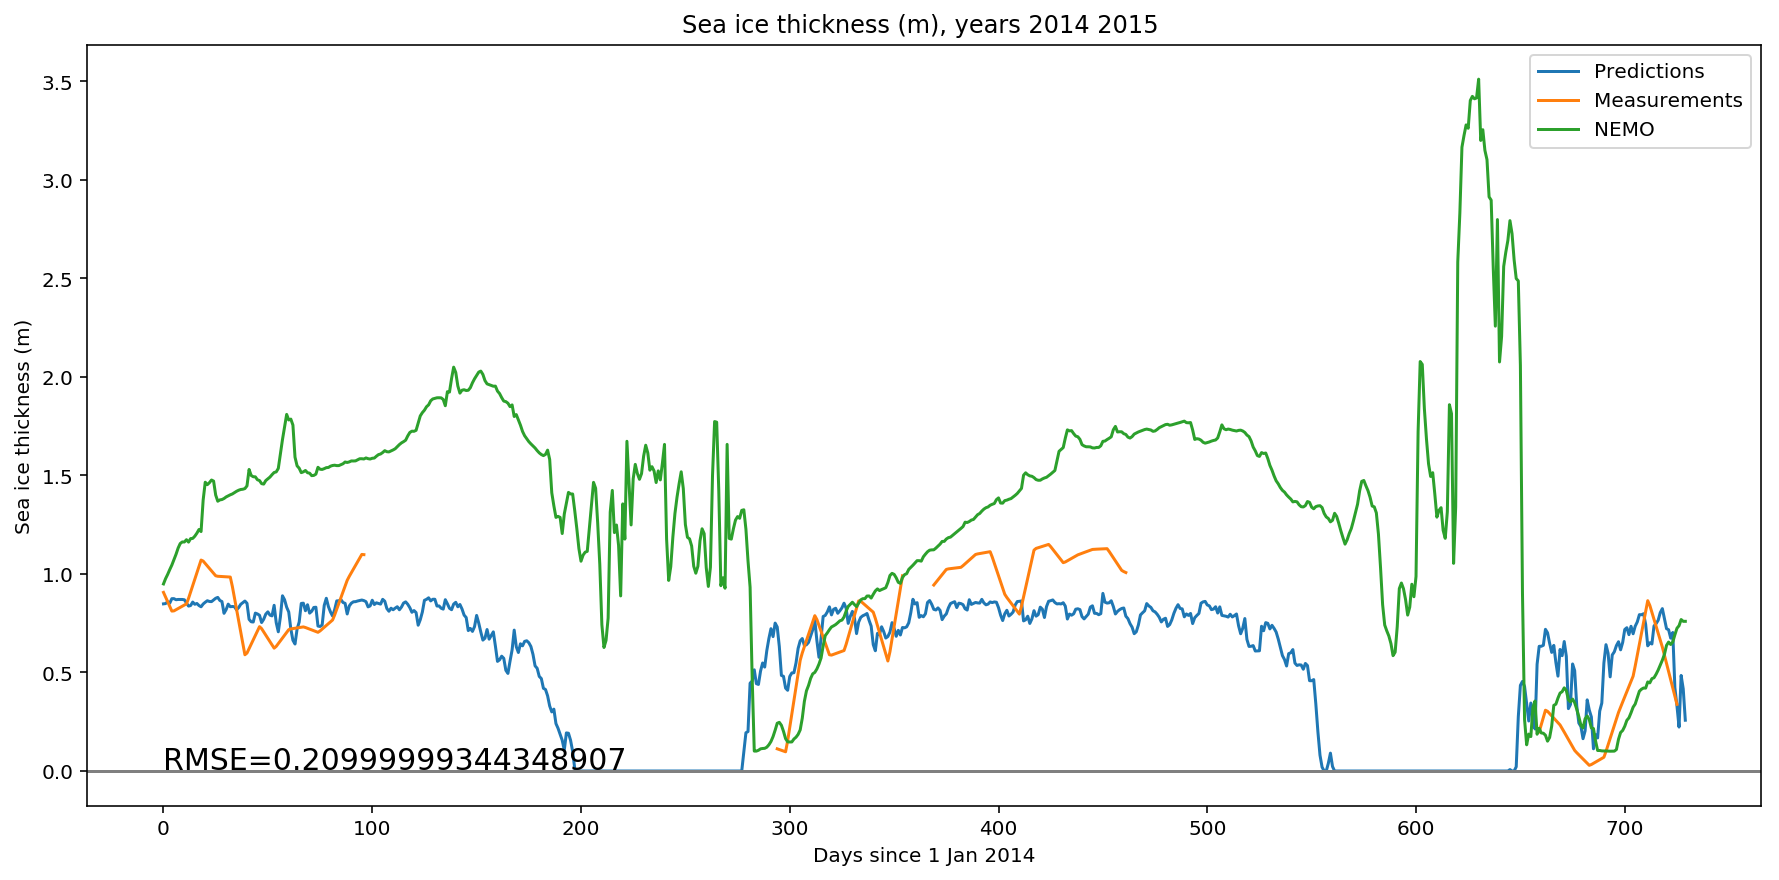

In [27]:
years_train = list(range(2010,2014))
years_test = [2014, 2015]
X_vars = ['ice_conc', 'tair']
y_var = 'Thickness'
point = (109, 203) # approximately 80N 80E Kara Sea
ft = FeatureTable(dx=10, dy=10, dt=0)

y, X = load_features(X_vars=X_vars,
                     y_var=y_var,
                     years=years_train,
                     point=point,
                     feature_table=ft)

y_test, X_test = load_features(X_vars=X_vars,
                               y_var=y_var,
                               years=years_test,
                               point=point,
                               feature_table=ft)
model_data = load_variable_years('icethic_cea', years_test, point)
mse_val, pred = regress(X, y, X_test, y_test, model=model)
plotting(pred, y_test, model_data, mse_val, years_test)
results_df.loc[len(results_df) + 1] = [years_train, years_test, X_vars, ft.dx, ft.dy, ft.dt, mse_val]

## 3
- **Years train**: 2010-2013
- **Years test** : 2014-2015
- **X train**: sat ice concentration, 2m air temperature
- **y test** : sat ice thickness
- **dx** : 0
- **dy** : 0
- **dt** : 0

Loading ice_conc
Loading tair
Loading Thickness
Total features 2, X size (1461, 2)
Loading ice_conc
Loading tair
Loading Thickness
Total features 2, X size (730, 2)


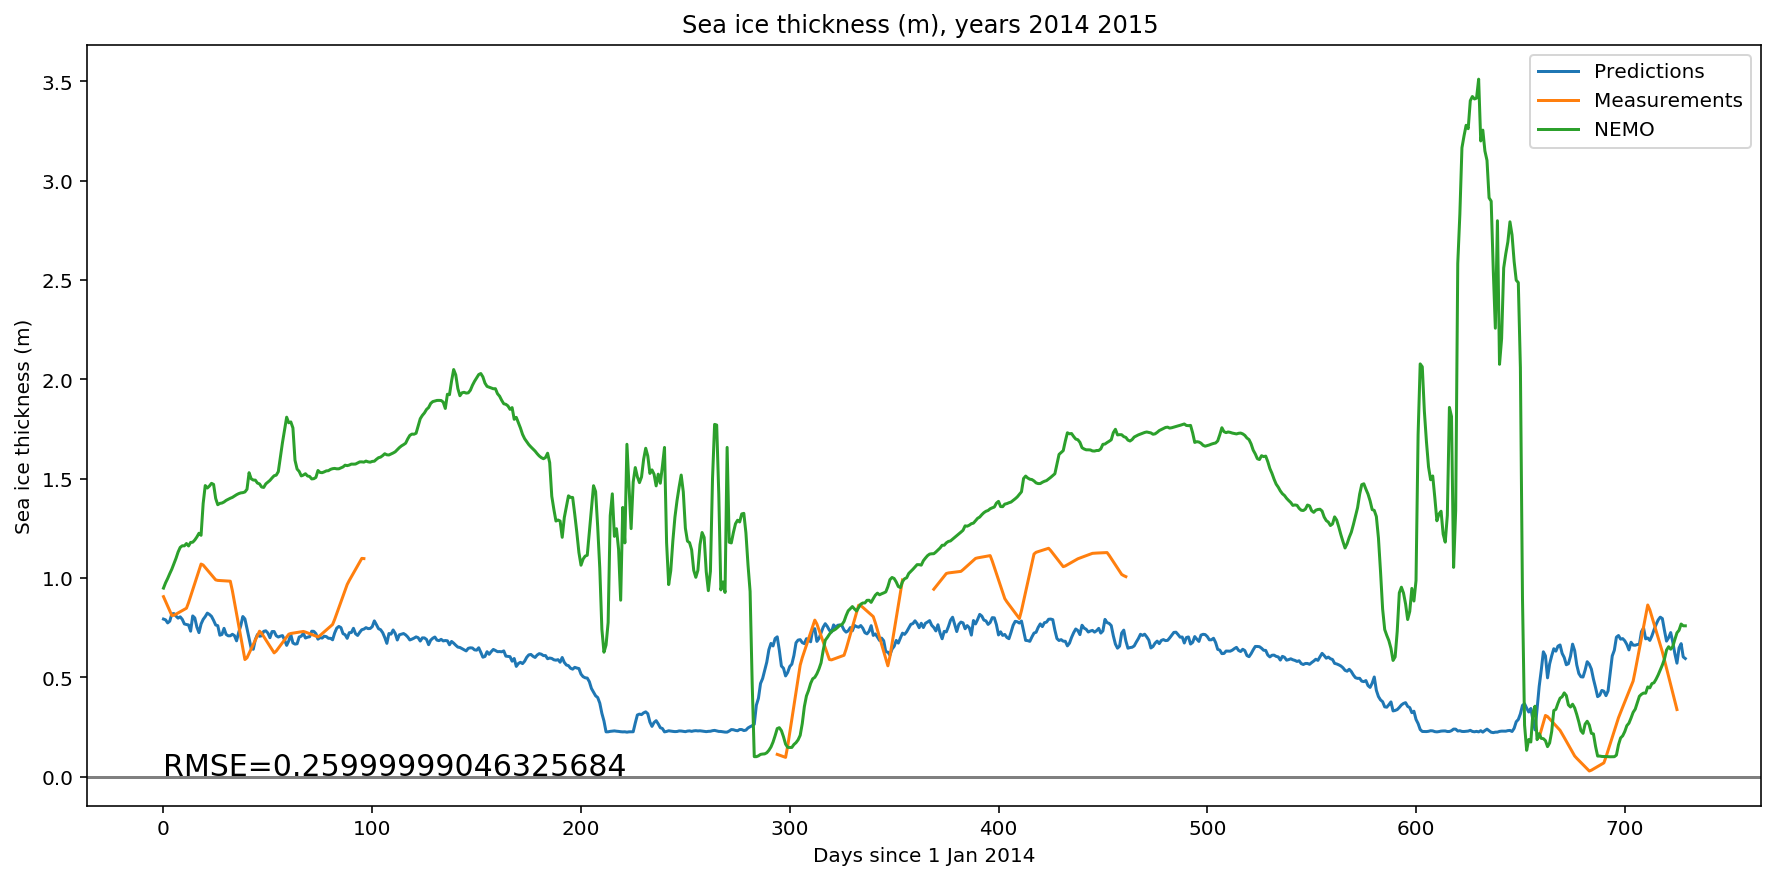

In [28]:
years_train = list(range(2010,2014))
years_test = [2014, 2015]
X_vars = ['ice_conc', 'tair']
y_var = 'Thickness'
point = (109, 203) # approximately 80N 80E Kara Sea
ft = FeatureTable(dx=0, dy=0, dt=0)

y, X = load_features(X_vars=X_vars,
                     y_var=y_var,
                     years=years_train,
                     point=point,
                     feature_table=ft)
y_test, X_test = load_features(X_vars=X_vars,
                               y_var=y_var,
                               years=years_test,
                               point=point,
                               feature_table=ft)
model_data = load_variable_years('icethic_cea', years_test, point)
mse_val, pred = regress(X, y, X_test, y_test, model=model)
plotting(pred, y_test, model_data, mse_val, years_test)
results_df.loc[len(results_df) + 1] = [years_train, years_test, X_vars, ft.dx, ft.dy, ft.dt, mse_val]

Loading ice_conc
Loading tair
Loading radlw
Loading radsw
Loading vosaline
Loading votemper
Loading Thickness
Total features 6, X size (1461, 7986)
Loading ice_conc
Loading tair
Loading radlw
Loading radsw
Loading vosaline
Loading votemper
Loading Thickness
Total features 6, X size (730, 7986)


/home/hpc-rosneft/drigo/surrogate/src/models.py:107: RuntimeWarning: invalid value encountered in less
  pred_out[pred_out < 0] = 0


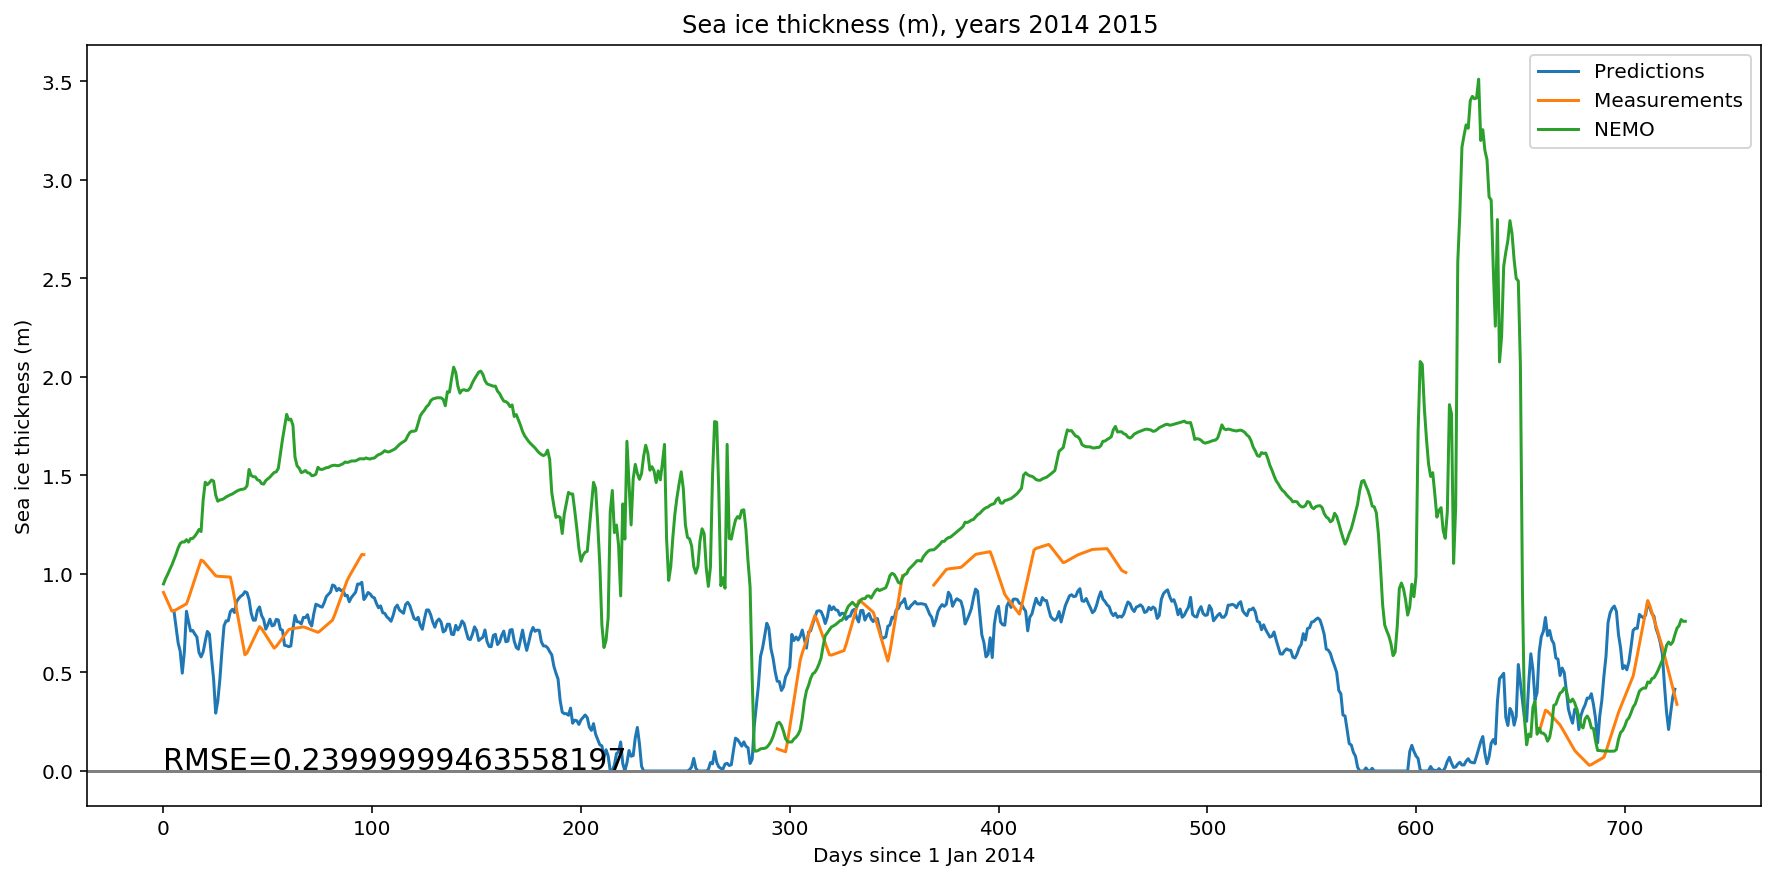

In [29]:
years_train = list(range(2010,2014))
years_test = [2014, 2015]
X_vars = ['ice_conc', 'tair', 'radlw', 'radsw', 'vosaline', 'votemper']
y_var = 'Thickness'
point = (109, 203) # approximately 80N 80E Kara Sea
ft = FeatureTable(dx=5, dy=5, dt=5)

y, X = load_features(X_vars=X_vars,
                     y_var=y_var,
                     years=years_train,
                     point=point,
                     feature_table=ft)
y_test, X_test = load_features(X_vars=X_vars,
                               y_var=y_var,
                               years=years_test,
                               point=point,
                               feature_table=ft)
model_data = load_variable_years('icethic_cea', years_test, point)
mse_val, pred = regress(X, y, X_test, y_test, model=model)
plotting(pred, y_test, model_data, mse_val, years_test)
results_df.loc[results_df.index.max() + 1] = [years_train, years_test, X_vars, ft.dx, ft.dy, ft.dt, mse_val]

In [30]:
results_df

,Years_train,Years_test,X,dx,dy,dt,RMSE
NaN,"[2010, 2011, 2012, 2013]","[2014, 2015]","[ice_conc, tair, radlw, radsw, vosaline, votem...",5,5,5,0.241414
2.0,"[2010, 2011, 2012, 2013]","[2014, 2015]","[ice_conc, tair, thick_cr2smos]",2,2,0,0.223311
3.0,"[2010, 2011, 2012, 2013]","[2014, 2015]","[ice_conc, tair, Thickness]",10,10,0,0.213435
4.0,"[2010, 2011, 2012, 2013]","[2014, 2015]","[ice_conc, tair, Thickness]",0,0,0,0.261205
5.0,"[2010, 2011, 2012, 2013]","[2014, 2015]","[ice_conc, tair, radlw, radsw, vosaline, votem...",5,5,5,0.241414
